In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split


Class
0    439
1    284
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x215c18d81a0>,
 [Text(-0.3634681783796167, 1.038215239391815, ''),
  Text(0.363468516673062, -1.0382151209587944, '')],
 [Text(-0.19825537002524546, 0.5662992214864444, '60.7%'),
  Text(0.19825555454894292, -0.5662991568866151, '39.3%')])

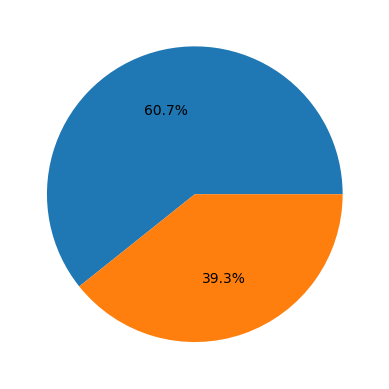

In [2]:
df = pd.read_csv('creditcard_2023.csv')

sizes = df['Class'].value_counts()
print(sizes)
plt.pie(sizes, autopct='%1.1f%%')

In [3]:
x_df = df.copy()
y_df = x_df.pop('Class')

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## sklearn

In [4]:
# p = 1, manhattan distance
# p = 2, euclidean distance

knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
y_pred = knn.predict(x_test)

In [6]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [22]:
# Finding the K closest neighbor and their distance from the random_data

random_data = [0.771866842,	-0.467677988,	0.513382444,	-0.233816812,	0.280092857,	0.485258763,	0.549707482,	-0.143737665,	0.273403484,	0.611842316,	0.055847663,	1.58026422,	0.18502574,	1.133836771,	0.468417245,	0.543081422,	0.293595109,	0.006363916,	-0.281621886,	-0.040856875,	-0.239621786,	-1.151719639,	0.062064446,	-0.629795732,	0.170125019,	-2.179574518,	-0.236784346,	-0.014178575,	7654.09]

distance, indices = knn.kneighbors([random_data], n_neighbors=5)

neighbors = []
for i in range(0,5):
    neighbors.append([indices[0][i], distance[0][i]])
    
neighbors

[[np.int64(505), np.float64(7652.34337818304)],
 [np.int64(15), np.float64(7652.354424705341)],
 [np.int64(112), np.float64(7652.357726169145)],
 [np.int64(254), np.float64(7652.36336821403)],
 [np.int64(338), np.float64(7652.365517971538)]]

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9586206896551724


## Manual coding

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [19]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

K = 3

correct_predictions = 0
total_validation_samples = len(x_test)

X_train = np.asarray(x_train)
Y_train = np.asarray(y_train)
X_test = np.asarray(x_test)
Y_test = np.asarray(y_test)

for idx, x_test in enumerate(X_test):
    distances = []

    for x_train in X_train:
        distance = euclidean_distance(x_train, x_test)
        distances.append(distance)

    distances = np.asarray(distances)

    distance_indices = np.argsort(distances)[:K]

    label = dict()
    label[0] = 0
    label[1] = 0

    for i in distance_indices:
        result = Y_train[i]
        label[result] += 1

    detected_class = max(zip(label.values(), label.keys()))[1]

    if detected_class == Y_test[idx]:
        correct_predictions += 1

accuracy = (correct_predictions / total_validation_samples) * 100
print(f"Accuracy: {accuracy:.2f}%")



Accuracy: 97.24%


sklearn.neighbors provides tools for implementing k-nearest neighbors algorithms. KNeighborsClassifier is a specific class within this module used for classification tasks, while sklearn.neighbors also includes other classes like NearestNeighbors for unsupervised nearest neighbor search and KNeighborsRegressor for regression tasks.

KNeighborsClassifier is a supervised learning algorithm that predicts the class of a data point based on the majority class of its k-nearest neighbors in the training data. It takes training data and their corresponding labels as input and, when given a new data point, finds the k-nearest data points from the training set and assigns the new point to the class that appears most frequently among those neighbors.

In contrast, sklearn.neighbors.NearestNeighbors is an unsupervised learning algorithm that focuses on finding the nearest neighbors for each data point without considering class labels. It can be used for various purposes, such as finding neighbors for other algorithms or for exploratory data analysis. It doesn't make predictions but rather provides information about the distances and indices of the nearest neighbors.

In summary, KNeighborsClassifier is used for classification, predicting the category of data points, while NearestNeighbors is a more general tool for finding nearest neighbors without focusing on prediction, and can be used in unsupervised learning scenarios.